In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
from sklearn import tree
warnings.filterwarnings('ignore')

In [122]:
path = r"Data\modcloth_final_data.json"

In [123]:
df = pd.read_json(path, lines=True)
df.head()

,bra size,bust,category,cup size,fit,height,hips,item_id,length,quality,review_summary,review_text,shoe size,shoe width,size,user_id,user_name,waist
0,34.0,36,new,d,small,5ft 6in,38.0,123373,just right,5.0,NaN,NaN,NaN,NaN,7,991571,Emily,29.0
1,36.0,NaN,new,b,small,5ft 2in,30.0,123373,just right,3.0,NaN,NaN,NaN,NaN,13,587883,sydneybraden2001,31.0
2,32.0,NaN,new,b,small,5ft 7in,NaN,123373,slightly long,2.0,NaN,NaN,9.0,NaN,7,395665,Ugggh,30.0
3,NaN,NaN,new,dd/e,fit,NaN,NaN,123373,just right,5.0,NaN,NaN,NaN,NaN,21,875643,alexmeyer626,NaN
4,36.0,NaN,new,b,small,5ft 2in,NaN,123373,slightly long,5.0,NaN,NaN,NaN,NaN,18,944840,dberrones1,NaN


In [124]:
df.columns = [x.replace(" ","_") for x in df.columns ]

In [125]:
missing_data = df.isnull()

In [126]:
df.drop(columns=['waist', 'bust', 'user_name','review_text','review_summary','shoe_size','shoe_width'], inplace=True)

In [127]:
X = df.drop(columns="fit")
y=df.fit

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=6)

In [129]:
def plot_barh(df,col, cmap = None, stacked=False, norm = None):
    df.plot(kind='barh', colormap=cmap, stacked=stacked)
    fig = plt.gcf()
    fig.set_size_inches(24,12)
    plt.title("Category vs {}-feedback -  cloth {}".format(col, '(Normalized)' if norm else ''), fontsize= 20)
    plt.ylabel('Category', fontsize = 18)
    plot = plt.xlabel('Frequency', fontsize=18)

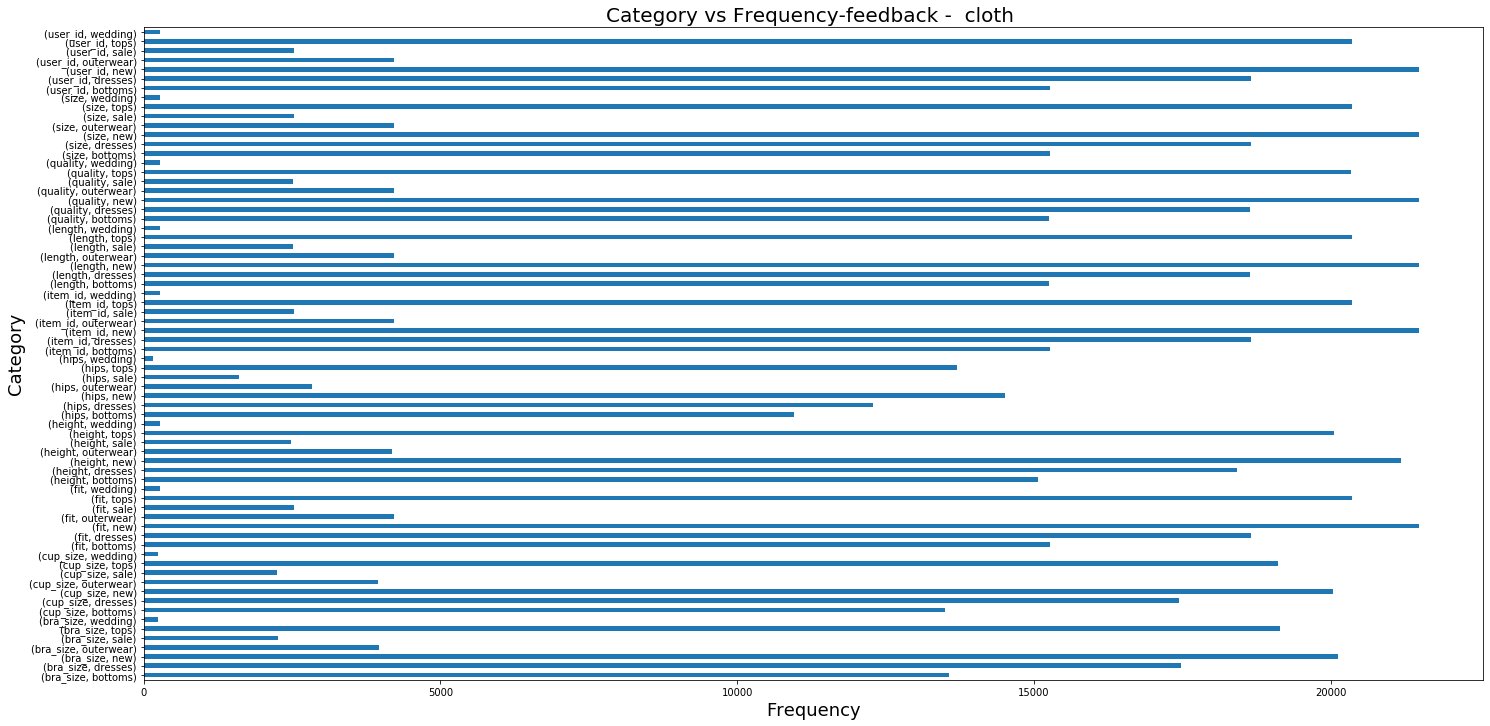

In [130]:
g_by_category = df.groupby(by="category")
cat_fit = g_by_category.count()
cat_fit = cat_fit.unstack()
plot_barh(cat_fit, "Frequency")

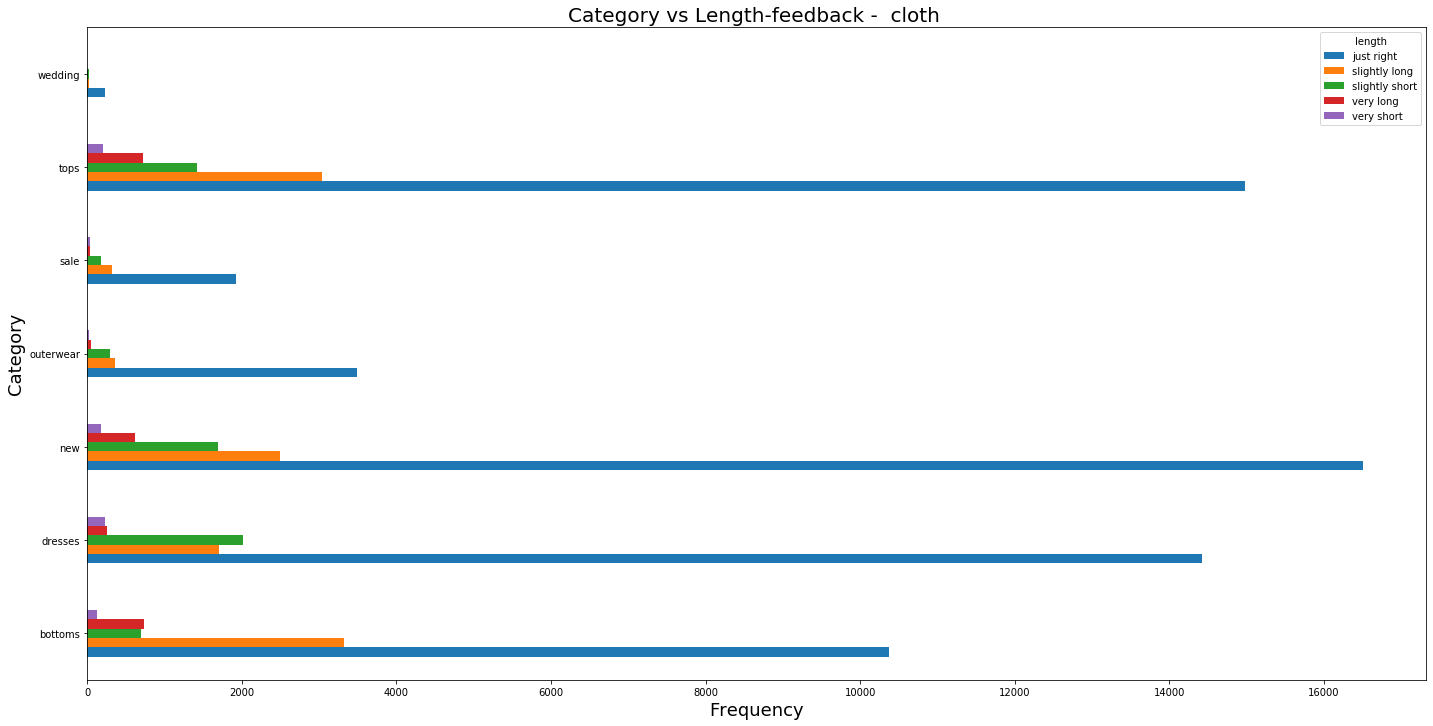

In [131]:
cat_len = g_by_category['length'].value_counts().unstack()
plot_barh(cat_len, "Length")

In [132]:
def get_cms(x):
    if(type(x)==str):
        if(len(x)>3):
            x = (int(x[0])*30.48) + (int(x[4:-2])*2.54)
        else:
            x = (int(x[0])*30.48)
    return x

In [133]:
X_train.height = X_train['height'].apply(get_cms)
X_test.height = X_test['height'].apply(get_cms)

In [134]:
X_train.head()

,bra_size,category,cup_size,height,hips,item_id,length,quality,size,user_id
8540,32.0,dresses,b,172.72,38.0,160625,slightly long,5.0,3,276443
30834,34.0,new,b,165.10,35.0,407044,just right,2.0,8,980141
6095,36.0,new,d,170.18,45.0,152513,just right,2.0,15,682176
14462,32.0,dresses,d,152.40,37.0,171740,just right,4.0,7,459825
37896,42.0,new,c,165.10,NaN,416942,just right,4.0,26,151852


In [135]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55469 entries, 8540 to 31626
Data columns (total 10 columns):
bra_size    51483 non-null float64
category    55469 non-null object
cup_size    51319 non-null object
height      54741 non-null float64
hips        37591 non-null float64
item_id     55469 non-null int64
length      55443 non-null object
quality     55425 non-null float64
size        55469 non-null int64
user_id     55469 non-null int64
dtypes: float64(4), int64(3), object(3)
memory usage: 4.7+ MB


In [136]:
X_train.shape

(55469, 10)

In [142]:
X_train = X_train.dropna(subset=['height', 'length', 'quality'])
X_test = X_test.dropna(subset=['height', 'length', 'quality'])

In [156]:
y_train = y_train[[x in X_train.index for x in y_train.index]]
y_test = y_test[[x in X_test.index for x in y_test.index]]

In [159]:
X_train.bra_size = X_train.bra_size.fillna(X_train.bra_size.mean())
X_test.bra_size = X_test.bra_size.fillna(X_test.bra_size.mean())

In [161]:
X_train.hips = X_train.hips.fillna(X_train.hips.mean())
X_test.hips = X_test.hips.fillna(X_test.hips.mean())

In [167]:
mode_1 = X_train.cup_size.mode()[0]
mode_2 = X_test.cup_size.mode()[0]

In [168]:
X_train.cup_size = X_train.cup_size.fillna(mode_1)
X_test.cup_size = X_test.cup_size.fillna(mode_2)

In [172]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [174]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

In [180]:
model = DecisionTreeClassifier(random_state=6)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [178]:
score = accuracy_score(y_test, y_pred)
print(score)

0.5751123992122766


In [179]:
precision = precision_score(y_test, y_pred, average=None)
print(precision)

[0.72714062 0.28549002 0.26194651]


In [183]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [184]:
parameters = {'max_depth':[5,10],'criterion':['gini','entropy'],'min_samples_leaf':[0.5,1]}

In [185]:
model = DecisionTreeClassifier(random_state=6)
grid = GridSearchCV(estimator=model, param_grid=parameters)

In [186]:
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)

In [187]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.6955003158324973


In [191]:
grid.best_score_

0.6973903183921288